In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,precision_score,f1_score,classification_report,roc_auc_score,roc_curve,precision_recall_curve,confusion_matrix
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import plot_precision_recall_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("churn.csv")

In [3]:
df.drop(['RowNumber','CustomerId','Surname','HasCrCard','Tenure'],axis=1,inplace=True)

In [4]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df['Geography']=df['Geography'].astype("category")
df['Gender']=df['Gender'].astype("category")
df['IsActiveMember']=df['IsActiveMember'].astype("category")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Balance          10000 non-null  float64 
 5   NumOfProducts    10000 non-null  int64   
 6   IsActiveMember   10000 non-null  category
 7   EstimatedSalary  10000 non-null  float64 
 8   Exited           10000 non-null  int64   
dtypes: category(3), float64(2), int64(4)
memory usage: 498.5 KB


In [7]:
df1=pd.get_dummies(df,drop_first=True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Balance            10000 non-null  float64
 3   NumOfProducts      10000 non-null  int64  
 4   EstimatedSalary    10000 non-null  float64
 5   Exited             10000 non-null  int64  
 6   Geography_Germany  10000 non-null  uint8  
 7   Geography_Spain    10000 non-null  uint8  
 8   Gender_Male        10000 non-null  uint8  
 9   IsActiveMember_1   10000 non-null  uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 507.9 KB


In [9]:
y=df1['Exited']
X=df1.drop("Exited",axis=1)

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print('Shape of X_train is: ',X_train.shape)
print('Shape of X_test is: ',X_test.shape)
print('Shape of y_train is: ',y_train.shape)
print('Shape of y_test is: ',y_test.shape)

Shape of X_train is:  (8000, 9)
Shape of X_test is:  (2000, 9)
Shape of y_train is:  (8000,)
Shape of y_test is:  (2000,)


In [11]:
print("Proportion of 0 in training set: ",len(y_train[y_train==0])/len(y_train))
print("Proportion of 1 in training set: ",len(y_train[y_train==1])/len(y_train))
print("Proportion of 0 in test set: ",len(y_test[y_test==0])/len(y_test))
print("Proportion of 1 in test set: ",len(y_test[y_test==1])/len(y_test))

Proportion of 0 in training set:  0.79625
Proportion of 1 in training set:  0.20375
Proportion of 0 in test set:  0.7965
Proportion of 1 in test set:  0.2035


## Logistic Regression Model

In [18]:
X_train_stand=X_train.values
X_test_stand=X_test.values
sc = StandardScaler()
X_train_stand[:,0:5] = sc.fit_transform(X_train.values[:,0:5])
X_test_stand[:,0:5] = sc.transform(X_test.values[:,0:5])

In [20]:
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_stand, y_train)
y_pred=classifier.predict(X_test_stand)

In [21]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1540   53]
 [ 330   77]]


In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.29       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [23]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
     'class_weight' : [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}] 
    }
]

In [24]:
clf = GridSearchCV(classifier, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1,scoring='f1')
best_clf = clf.fit(X_train_stand,y_train)
best_clf.best_estimator_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [      nan       nan 0.        ...       nan 0.4817934 0.4817934]
  warnings.warn(


LogisticRegression(C=0.08858667904100823, class_weight={0: 0.3, 1: 0.7},
                   penalty='l1', random_state=42, solver='saga')

In [25]:
print('Best Params: ', best_clf.best_params_) 
print('Best Score: ', best_clf.best_score_) 

Best Params:  {'C': 0.08858667904100823, 'class_weight': {1: 0.7, 0: 0.3}, 'penalty': 'l1', 'solver': 'saga'}
Best Score:  0.4851024208566108


In [31]:
logreg=LogisticRegression(C=0.08858667904100823, class_weight={0: 0.3, 1: 0.7},
                   penalty='l1', random_state=42, solver='saga')
logreg.fit(X_train_stand,y_train)
y_pred_logreg=logreg.predict(X_test_stand)

In [33]:
print(classification_report(y_test,y_pred_logreg))
#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_logreg)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1593
           1       0.49      0.51      0.50       407

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000



array([[1377,  216],
       [ 200,  207]], dtype=int64)

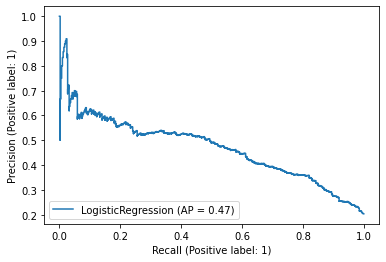

In [34]:
plot_precision_recall_curve(logreg, X_test_stand,y_test)

## Decision Tree Model

In [50]:
#Model fitting with fixed parameters of Decision tree
model_dt = DecisionTreeClassifier(criterion = 'gini', random_state = 10, max_depth = 3, min_samples_leaf = 8)
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
print(confusion_matrix(y_test, y_pred))

[[1579   14]
 [ 310   97]]


In [53]:
print(classification_report(y_test,y_pred, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1593
           1       0.87      0.24      0.37       407

    accuracy                           0.84      2000
   macro avg       0.85      0.61      0.64      2000
weighted avg       0.84      0.84      0.80      2000



In [54]:
#Build Decision Tree model with hyperparameter tuning
parameters = {'criterion': ('gini','entropy')
              , 'max_depth': np.arange(3,20)
              , 'max_features': ('auto','sqrt','log2')
              , 'min_samples_split': np.arange(2,20)
              , 'min_samples_leaf' : np.arange(2,30)
             }

In [73]:
DT_grid = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 5,scoring='f1',verbose = True)
DT_grid.fit(X_train, y_train)
print(DT_grid.best_estimator_)
print(DT_grid.best_params_)
print(DT_grid.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
DecisionTreeClassifier(criterion='entropy', max_depth=14, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=19)
{'min_samples_split': 19, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 14, 'criterion': 'entropy'}
0.5455785160470639


In [37]:
#Rebuild model with best estimators
#DT_Model = DT_grid.best_estimator_
DT_Model = DecisionTreeClassifier(criterion='entropy', max_depth=14, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=19,random_state=3)
DT_Model.fit(X_train, y_train)
y_pred_dt = DT_Model.predict(X_test)
y_pred_dt

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [38]:
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

[[1520   73]
 [ 229  178]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.71      0.44      0.54       407

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.83      2000



Text(0.5, 1.0, '2-class Precision-Recall curve ')

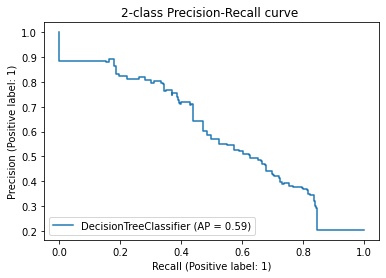

In [39]:
precision = precision_score(y_test,y_pred_dt)
disp = plot_precision_recall_curve(DT_Model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve ')

<AxesSubplot:title={'center':'FEATURE IMPORTANCES'}>

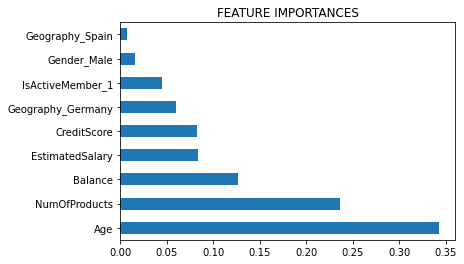

In [49]:
feat_imp=pd.Series(DT_Model.feature_importances_,index=X_train.columns)
plt.title("FEATURE IMPORTANCES")
feat_imp.nlargest(9).plot(kind='barh')

In [50]:
feature_imp=DT_Model.feature_importances_
columns=['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary','Geography_Germany', 'Geography_Spain', 'Gender_Male','IsActiveMember_1']
sorted(zip(feature_imp,columns),reverse=True)

[(0.34252029867164724, 'Age'),
 (0.23622868647944154, 'NumOfProducts'),
 (0.1264249357341593, 'Balance'),
 (0.08358877533846913, 'EstimatedSalary'),
 (0.08271133539280778, 'CreditScore'),
 (0.06010665055067603, 'Geography_Germany'),
 (0.04512480802179597, 'IsActiveMember_1'),
 (0.015585508584862896, 'Gender_Male'),
 (0.007709001226140102, 'Geography_Spain')]

## Random Forests

In [50]:
%%time
rf=RandomForestClassifier(random_state=42)
param_grid={'max_depth':np.arange(2,25),'max_features':np.arange(1,6),'min_samples_leaf':np.arange(4,40),'min_samples_split':np.arange(5,50),'n_estimators':[100,200,300,400,500,600],'criterion':['gini','entropy']}
random_search=RandomizedSearchCV(rf,param_grid,cv=5,scoring='f1',n_jobs=-1)
random_search.fit(X_train,y_train)
print(random_search.best_params_)
print(random_search.best_score_)

{'n_estimators': 500, 'min_samples_split': 30, 'min_samples_leaf': 4, 'max_features': 5, 'max_depth': 19, 'criterion': 'gini'}
0.5859080843250969
Wall time: 1min 15s


In [40]:
rf_randomized=RandomForestClassifier(max_depth=19,max_features=5,min_samples_leaf=4,min_samples_split=30,n_estimators=500,criterion='gini')
rf_randomized.fit(X_train,y_train)
y_pred=rf_randomized.predict(X_test)
y_pred_prob=rf_randomized.predict_proba(X_test)[:,1]

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.77      0.46      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



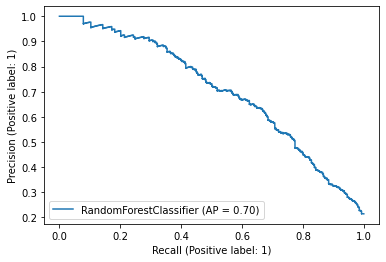

In [48]:
plot_precision_recall_curve(rf_randomized,X_test,y_test)

<AxesSubplot:title={'center':'FEATURE IMPORTANCES'}>

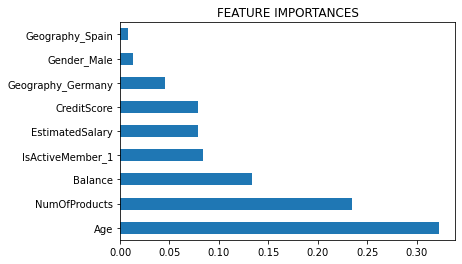

In [15]:
feat_imp=pd.Series(rf_randomized.feature_importances_,index=X_train.columns)
plt.title("FEATURE IMPORTANCES")
feat_imp.nlargest(9).plot(kind='barh')

In [21]:
feature_imp=rf_randomized.feature_importances_
columns=['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary','Geography_Germany', 'Geography_Spain', 'Gender_Male','IsActiveMember_1']
sorted(zip(feature_imp,columns),reverse=True)

[(0.32258162977375676, 'Age'),
 (0.23512785080071033, 'NumOfProducts'),
 (0.13375564390716793, 'Balance'),
 (0.08401145124927219, 'IsActiveMember_1'),
 (0.07918581378931173, 'EstimatedSalary'),
 (0.07854832203703298, 'CreditScore'),
 (0.045884587775520576, 'Geography_Germany'),
 (0.013094899070297377, 'Gender_Male'),
 (0.007809801596929963, 'Geography_Spain')]

## Plotting Precision Recall curves for all 3 models

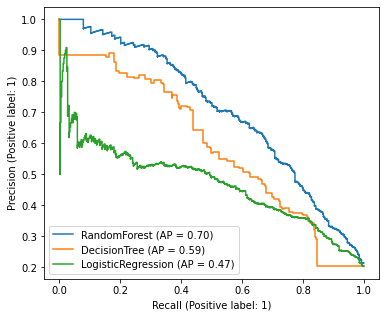

In [47]:
plt.figure(figsize=(6,5))
plot_precision_recall_curve(rf_randomized,X_test,y_test,ax=plt.gca(),name='RandomForest')
plot_precision_recall_curve(DT_Model,X_test,y_test,ax=plt.gca(),name='DecisionTree')
plot_precision_recall_curve(logreg,X_test_stand,y_test,ax=plt.gca(),name='LogisticRegression')
plt.show()

### Random forest is giving us better results, thus we will consider this as the final model.


# SMOTE-NC for balancing the target classes

In [13]:
X_train.columns

Index(['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male',
       'IsActiveMember_1'],
      dtype='object')

In [52]:
smotenc=SMOTENC([5,6,7,8],random_state=999)

In [53]:
X_oversample,y_oversample=smotenc.fit_resample(X_train,y_train)

## Random forest model

In [16]:
%%time
rf2=RandomForestClassifier(random_state=42)
param_grid2={'max_depth':np.arange(2,25),'max_features':np.arange(1,6),'min_samples_leaf':np.arange(4,40),'min_samples_split':np.arange(5,50),'n_estimators':[100,200,300,400,500,600],'criterion':['gini','entropy']}
random_search2=RandomizedSearchCV(rf2,param_grid2,cv=5,scoring='f1',n_jobs=-1)
random_search2.fit(X_oversample,y_oversample)
print(random_search2.best_params_)
print(random_search2.best_score_)

{'n_estimators': 300, 'min_samples_split': 39, 'min_samples_leaf': 21, 'max_features': 4, 'max_depth': 24, 'criterion': 'entropy'}
0.8145862564073607
Wall time: 2min 30s


In [33]:
rf_randomized2=RandomForestClassifier(max_depth=24,max_features=4,min_samples_leaf=21,min_samples_split=39,n_estimators=300,criterion='entropy')
rf_randomized2.fit(X_oversample,y_oversample)
y_pred=rf_randomized2.predict(X_test)
y_pred_prob=rf_randomized2.predict_proba(X_test)[:,1]

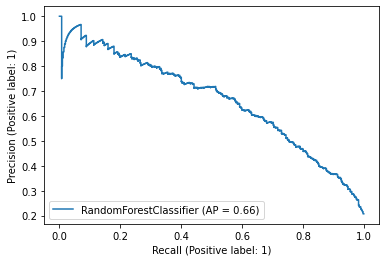

In [80]:
plot_precision_recall_curve(rf_randomized2,X_test,y_test)

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1593
           1       0.52      0.73      0.61       407

    accuracy                           0.81      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.81      0.82      2000



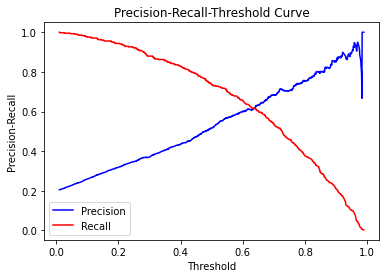

In [23]:
precision,recall,threshold=precision_recall_curve(y_test,y_pred_prob)
plt.plot(threshold,precision[:-1],'b-',label='Precision')
plt.plot(threshold,recall[:-1],'r-',label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Precision-Recall")
plt.title("Precision-Recall-Threshold Curve")
plt.legend()
plt.show()

<AxesSubplot:title={'center':'FEATURE IMPORTANCES'}>

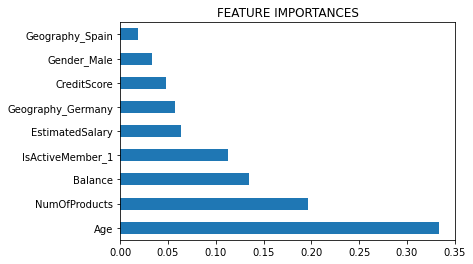

In [24]:
feat_imp=pd.Series(rf_randomized2.feature_importances_,index=X_train.columns)
plt.title("FEATURE IMPORTANCES")
feat_imp.nlargest(9).plot(kind='barh')

In [27]:
feature_imp=rf_randomized2.feature_importances_
sorted(zip(feature_imp,X_train.columns),reverse=True)

[(0.3334236934318283, 'Age'),
 (0.19686962847530332, 'NumOfProducts'),
 (0.1344547828234957, 'Balance'),
 (0.11291497520548335, 'IsActiveMember_1'),
 (0.06394950597744913, 'EstimatedSalary'),
 (0.05722567170000316, 'Geography_Germany'),
 (0.048126507257558404, 'CreditScore'),
 (0.03379022942313568, 'Gender_Male'),
 (0.019245005705743033, 'Geography_Spain')]

## Decision Tree Model

In [30]:
dt=DecisionTreeClassifier(random_state=12)
param_grid_dt={'max_depth':np.arange(2,25),'max_features':np.arange(1,6),'min_samples_leaf':np.arange(4,40),'min_samples_split':np.arange(5,50),'criterion':['gini','entropy']}
random_search_dt=RandomizedSearchCV(dt,param_grid_dt,cv=5,scoring='f1',n_jobs=-1)
random_search_dt.fit(X_oversample,y_oversample)
print(random_search_dt.best_params_)
print(random_search_dt.best_score_)

{'min_samples_split': 17, 'min_samples_leaf': 16, 'max_features': 5, 'max_depth': 8, 'criterion': 'entropy'}
0.7934850296666509


In [54]:
dt_smote=DecisionTreeClassifier(min_samples_split= 17, min_samples_leaf= 16, max_features= 5, max_depth= 8, criterion= 'entropy',random_state=12)
dt_smote.fit(X_oversample,y_oversample)
y_pred_smote_dt=dt_smote.predict(X_test)
y_predprob_smote_dt=dt_smote.predict_proba(X_test)[:,1]

In [55]:
print(classification_report(y_test,y_pred_smote_dt))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.48      0.74      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



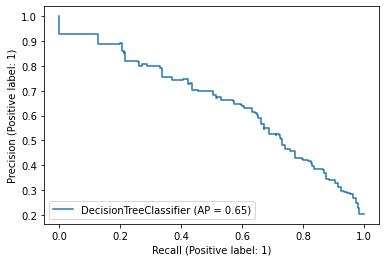

In [56]:
plot_precision_recall_curve(dt_smote,X_test,y_test)

### Using SMOTE, we are getting a model which is overfitting the training dataset. Thus we will refrain ourselves from using SMOTE.